In [222]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
import sklearn.tree as tree
from IPython.display import Image
from six import StringIO
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [105]:
dfbank1 = pd.read_csv('bank/bank-additional-full.csv', ';')

In [106]:
dfbank1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [107]:
dfbank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [108]:
dfbank1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [109]:
dfbank1.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [110]:
missing = dfbank1.isnull().sum()/len(dfbank1)*100

print(pd.DataFrame([missing[missing>0],pd.Series(dfbank1.isnull().sum()[dfbank1.isnull().sum()>1000])], index=['percent missing','how many missing']))

Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


##### There are no missing values in the dataset. Data type also seems correct. So we don't need to handle missing data for this case study

In [111]:
dfbank1.select_dtypes(np.int64).nunique()

age           78
duration    1544
campaign      42
pdays         27
previous       8
dtype: int64

In [112]:
dfbank1.select_dtypes(np.float64).nunique()

emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
dtype: int64

In [113]:
dfbank1_dup = dfbank1[dfbank1.duplicated(keep='last')]
dfbank1_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [114]:
dfbank1.drop_duplicates(inplace=True)

print(sum(dfbank1.duplicated()))

0


In [115]:
dfbank1.shape

(41176, 21)

##### So duplicated data is gone

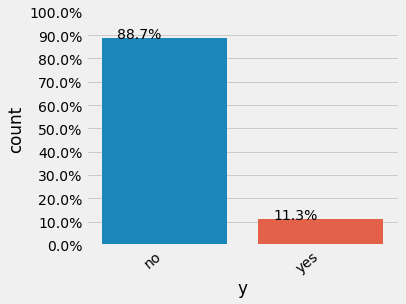

In [153]:
#total subsciption visualization
plt.figure(figsize=(5,4))
plt.style.use('fivethirtyeight')

Y = dfbank1['y']
total = len(Y)*1.
ax=sns.countplot(x="y", data=dfbank1)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

##### Only 11.3% will say yes to subscription of direct marketing (almost 1/8 compared to no subscription)

### Correlation matrix of numerical features

Text(0.5, 1.05, 'Pearson correlation of Features')

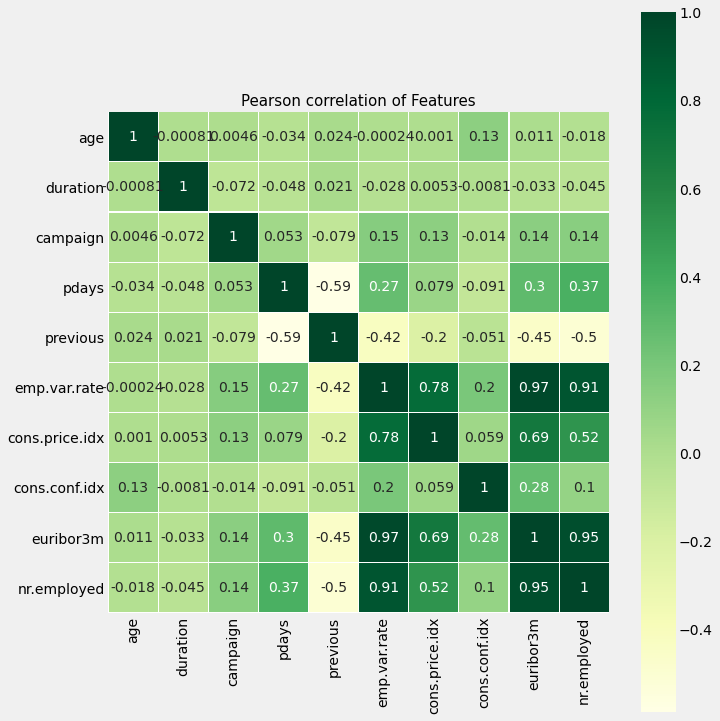

In [116]:
corr = dfbank1.corr()

f, ax = plt.subplots(figsize=(10,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

##### Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. 
##### A positive correlation indicates the extent to which those variables increase or decrease in parallel.
##### A negative correlation indicates the extent to which one variable increases as the other decreases.
##### This can be a very useful tool to quickly check which features are more correlated and which pair of features are not.

##### From the above heatmap we can see that there are some numerical features which share a high correlation between them
##### Most of them are float type e.g nr.employed and euribor3m these features share a correlation value of 0.95 and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.

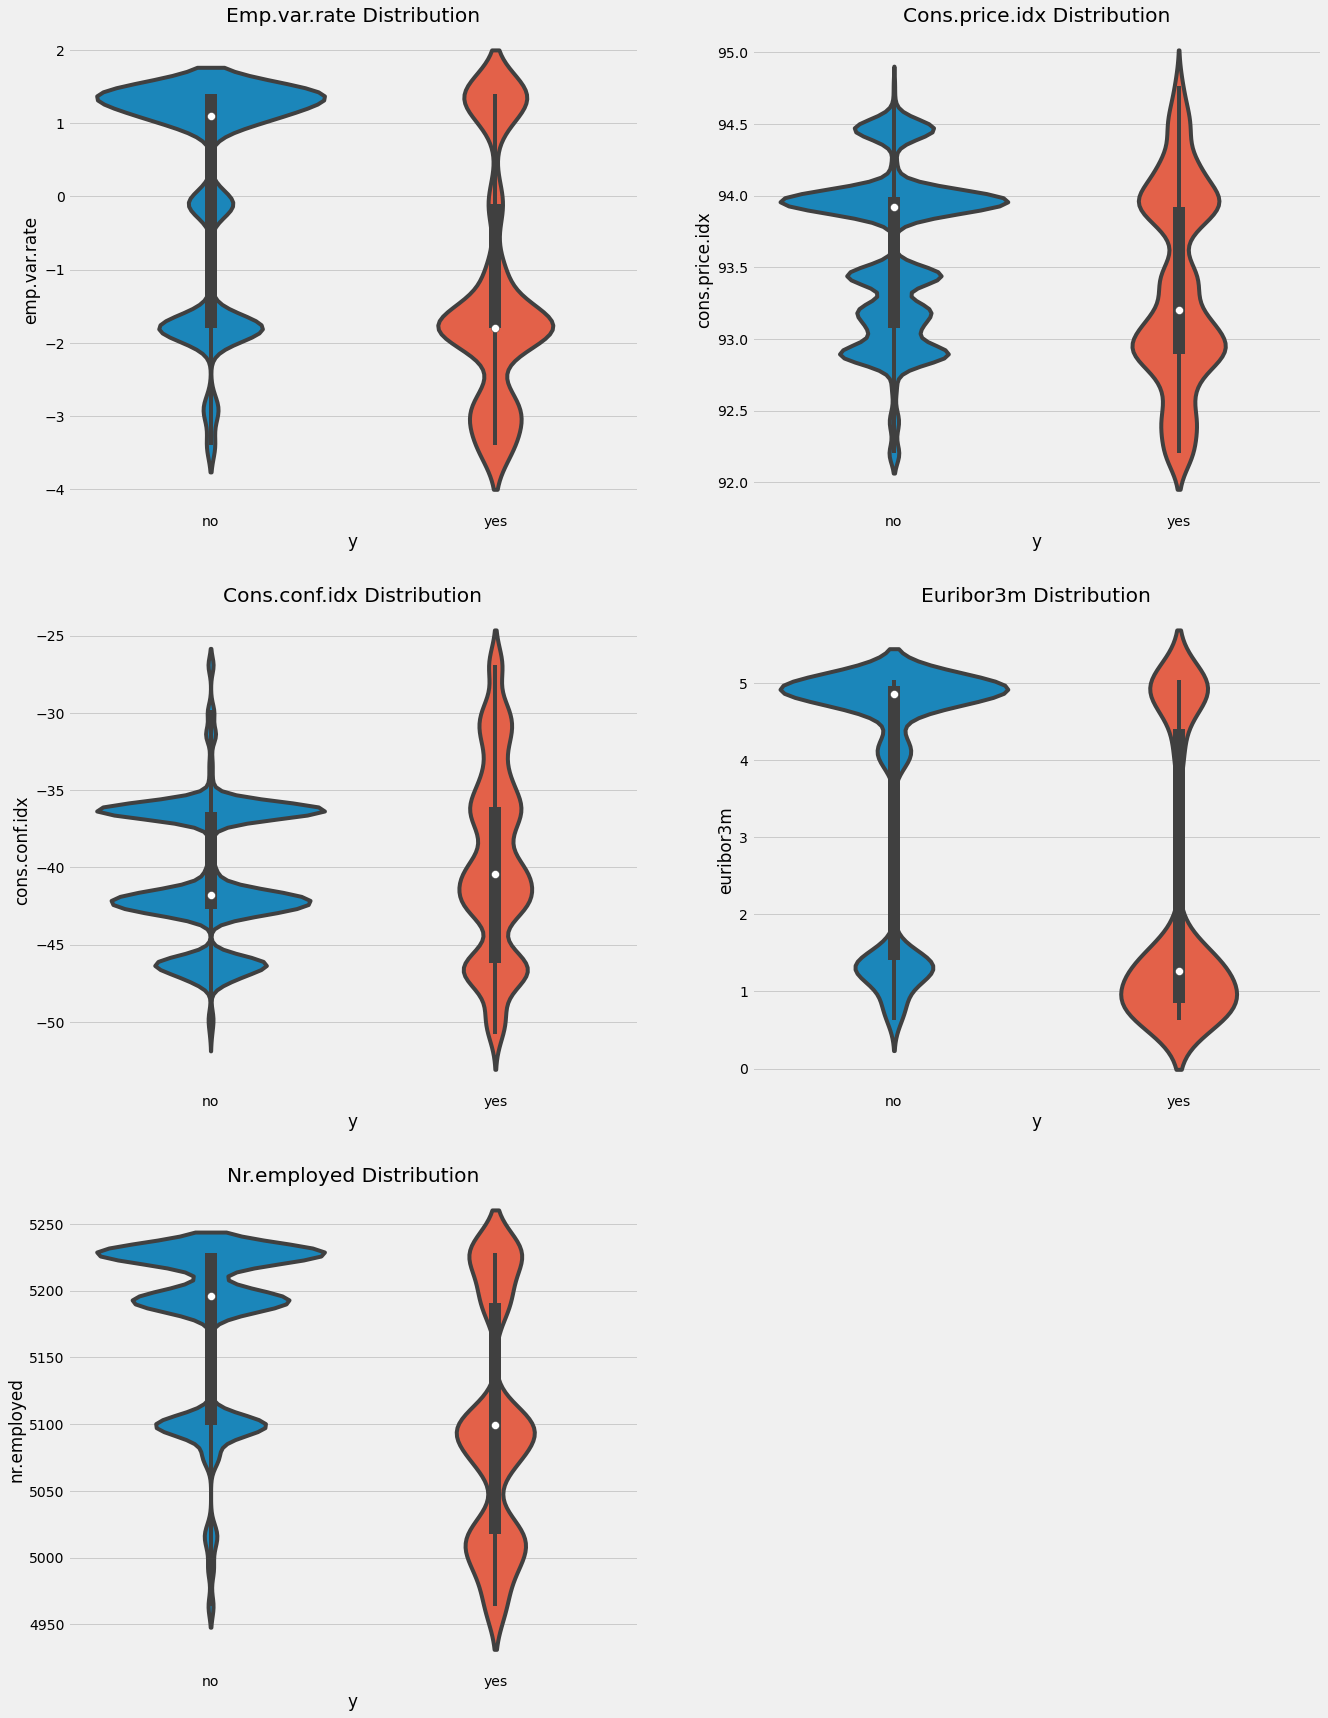

In [140]:
#Lets visualize float dtype with violin plot

plt.figure(figsize = (20, 16))

for i, col in enumerate(dfbank1.select_dtypes(np.float64)):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    sns.violinplot(x='y', y=col, data=dfbank1);
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel('y'); plt.ylabel(f'{col}')

plt.subplots_adjust(top = 2)

##### All of them (emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed) will be featured in the model

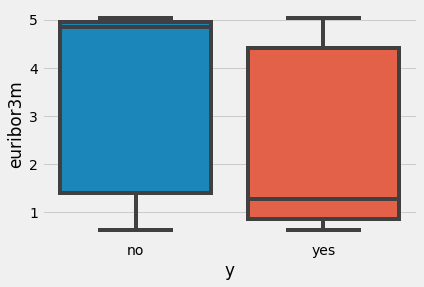

In [120]:
#All of float type are interesting especially euribor3m...
sns.boxplot(data=dfbank1, x="y", y="euribor3m")
plt.show()

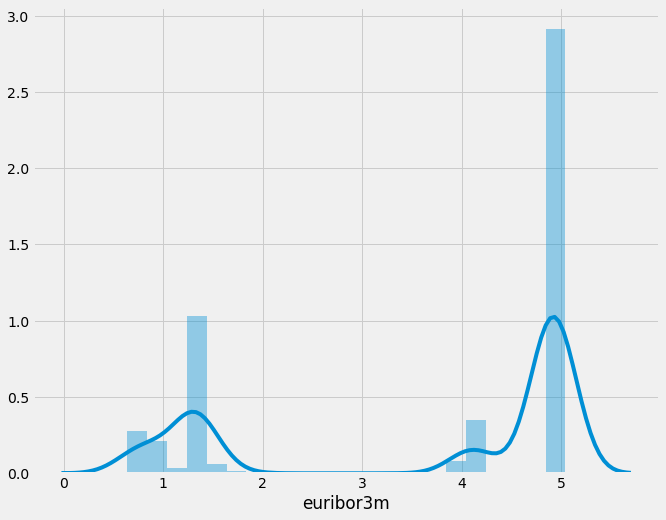

In [121]:
plt.figure(figsize=(10,8))
sns.distplot(dfbank1["euribor3m"])
plt.show()

##### From the euribor3m box plot we can clearly see the difference in median for both the classes and confirmed with distibution plot.
##### This indicates that the feature can be very useful for our case study.
##### But we can validate the assumption only by applying models and extracting feature importance.

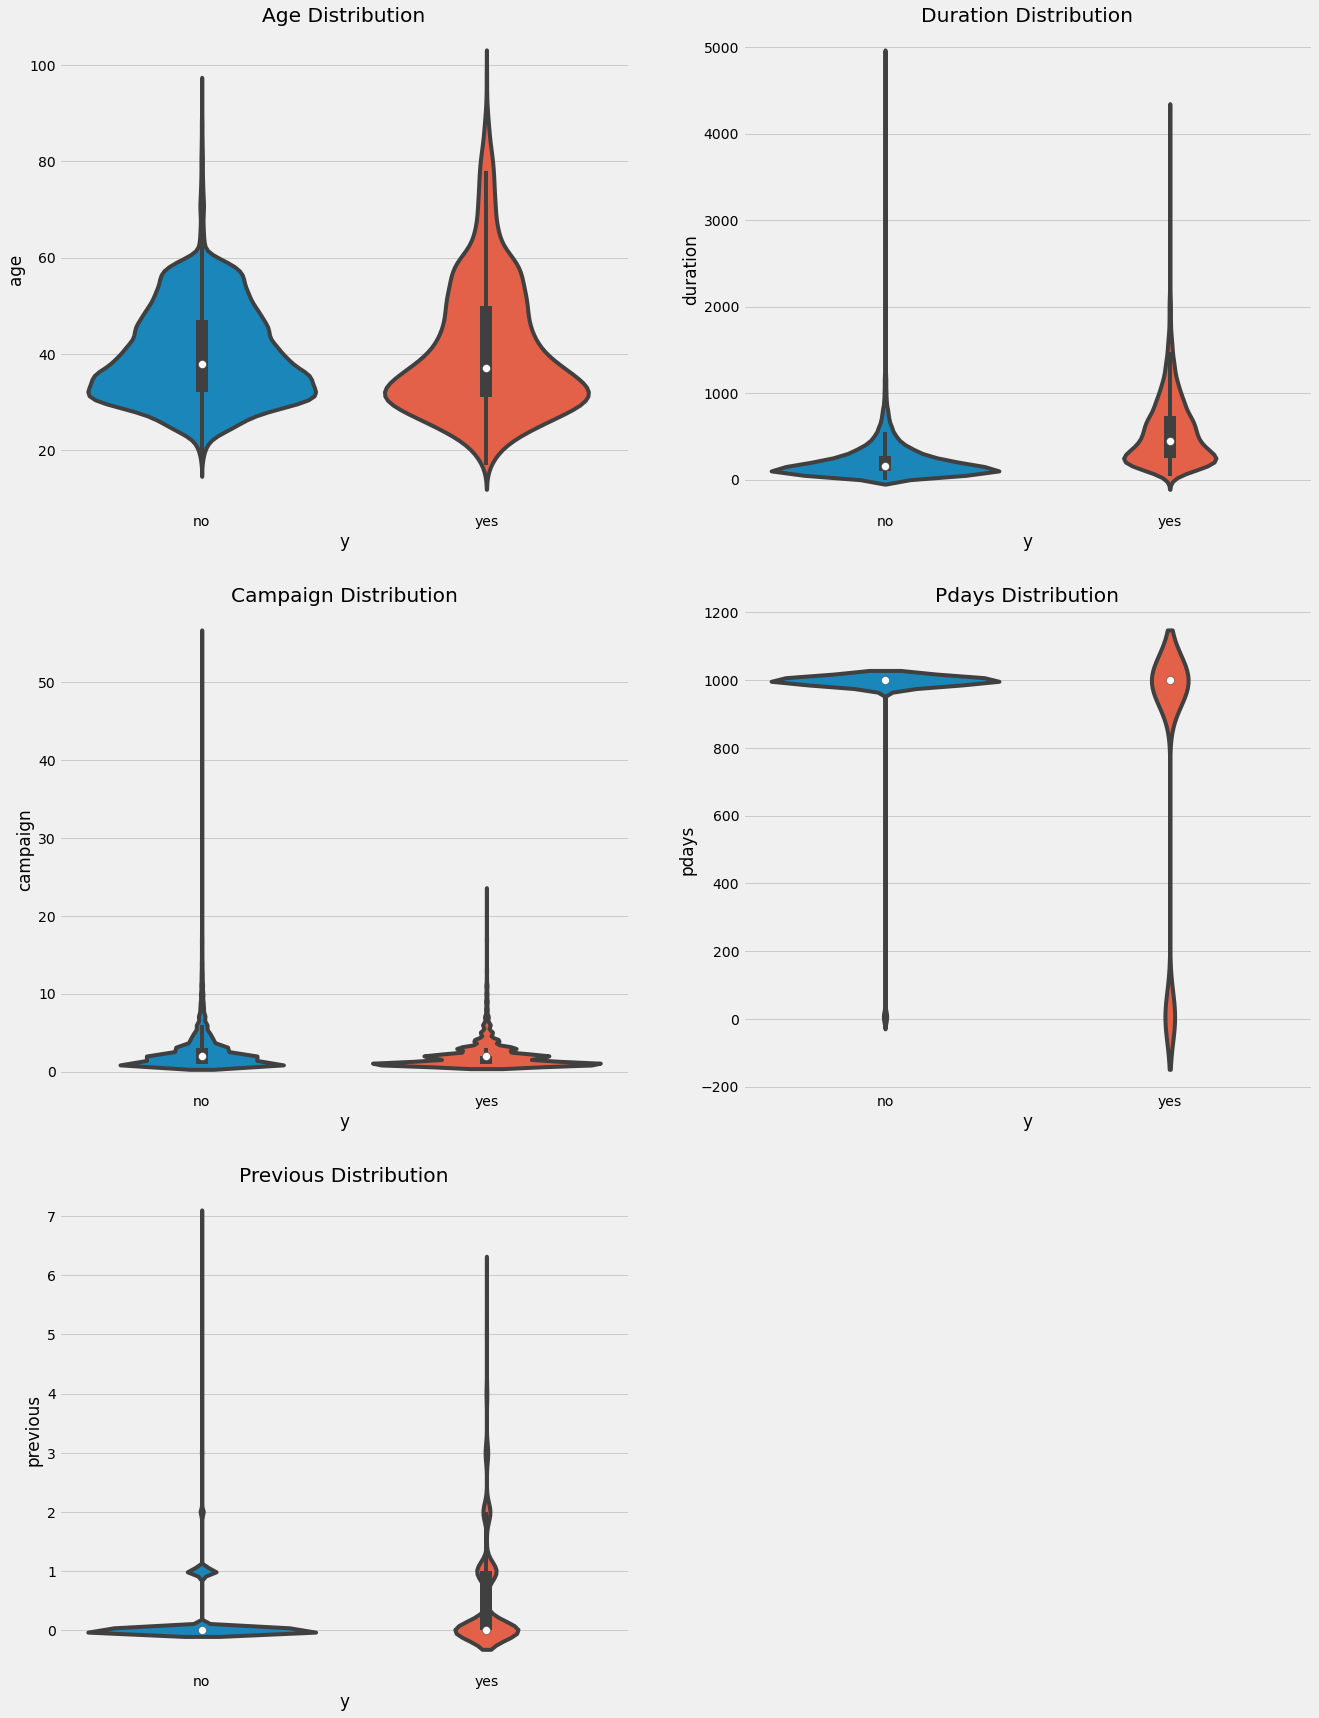

In [158]:
#Lets visualize integer dtype with violin plot

plt.figure(figsize = (20, 16))

for i, col in enumerate(dfbank1.select_dtypes(np.int64)):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    sns.violinplot(x='y', y=col, data=dfbank1);
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel('y'); plt.ylabel(f'{col}')

plt.subplots_adjust(top = 2)

##### Age median is very close for both yes and no subscription, so it will not be a good indicator for model
##### Duration is good but it will be deleted due to initial information for this case study
##### Campaign, Pdays, and previous distribution are also not good, so they won't be featured for model
##### All of int64 dtype (age, duration, campaign, pdays, previous) won't be featured for model

In [133]:
dfbank1.select_dtypes(np.object).nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [164]:
#Lets visualize object dtype with count plot along with Y

def countplot_withY(label, dataset):
    plt.figure(figsize=(20,10))
    Y = dfbank1[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dfbank1, hue="y")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    #ax.legend(labels=['no','yes'])
    plt.show()

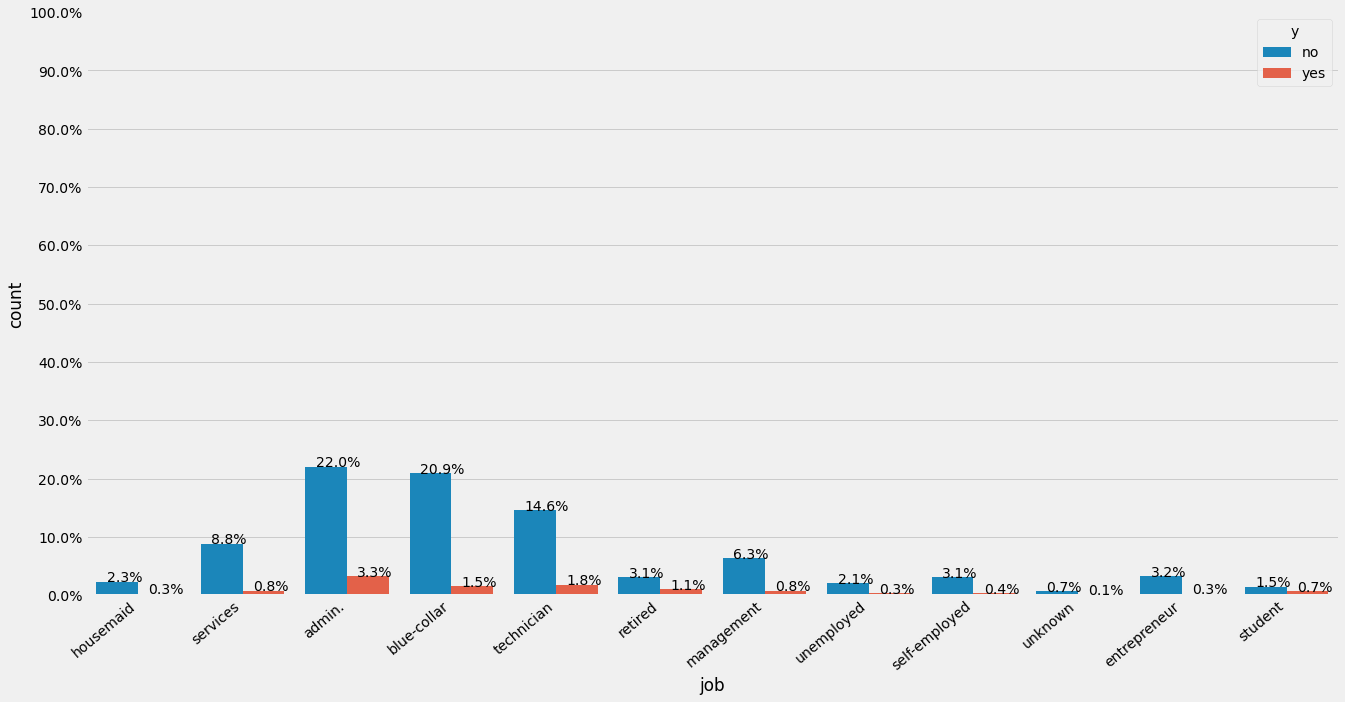

In [169]:
countplot_withY('job', dfbank1)

##### There is possibility that one profession has chance to subscribe compared with other profession. Job will be featured in the model

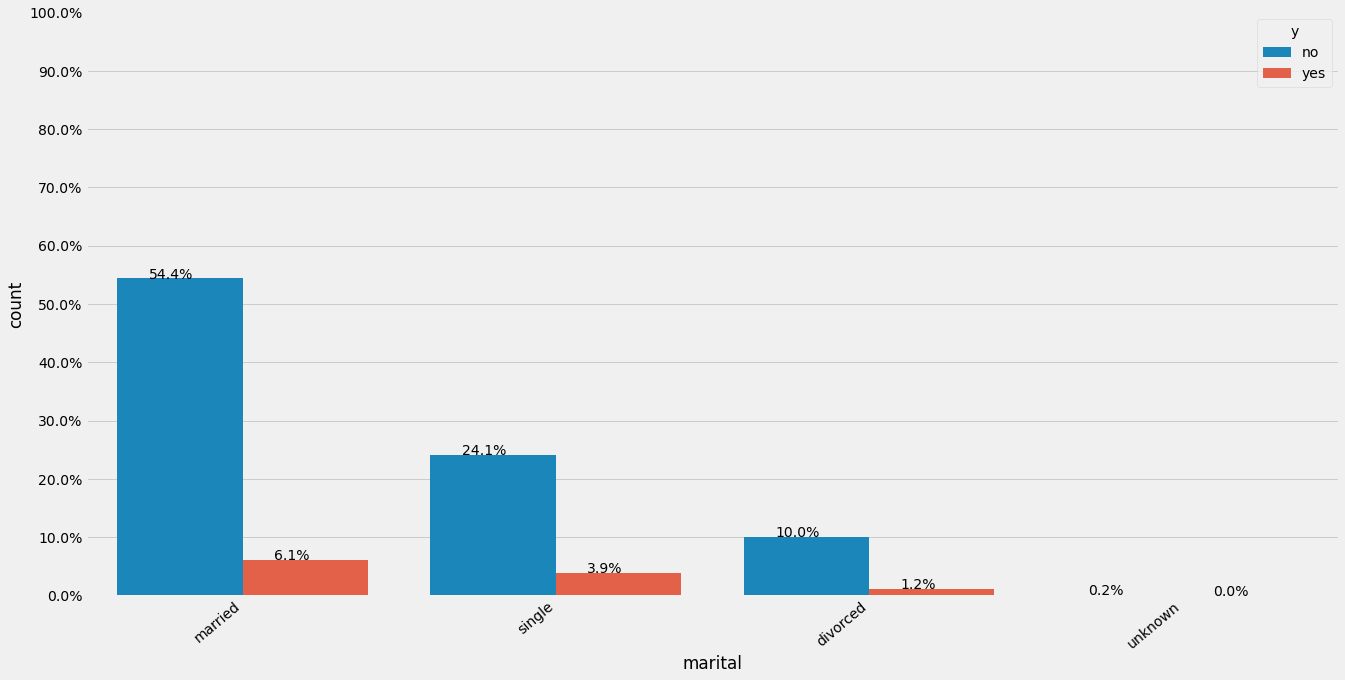

In [170]:
countplot_withY('marital', dfbank1)

##### There is possibility that one marital status has chance to subscribe compared with others. Marital will be featured in the model

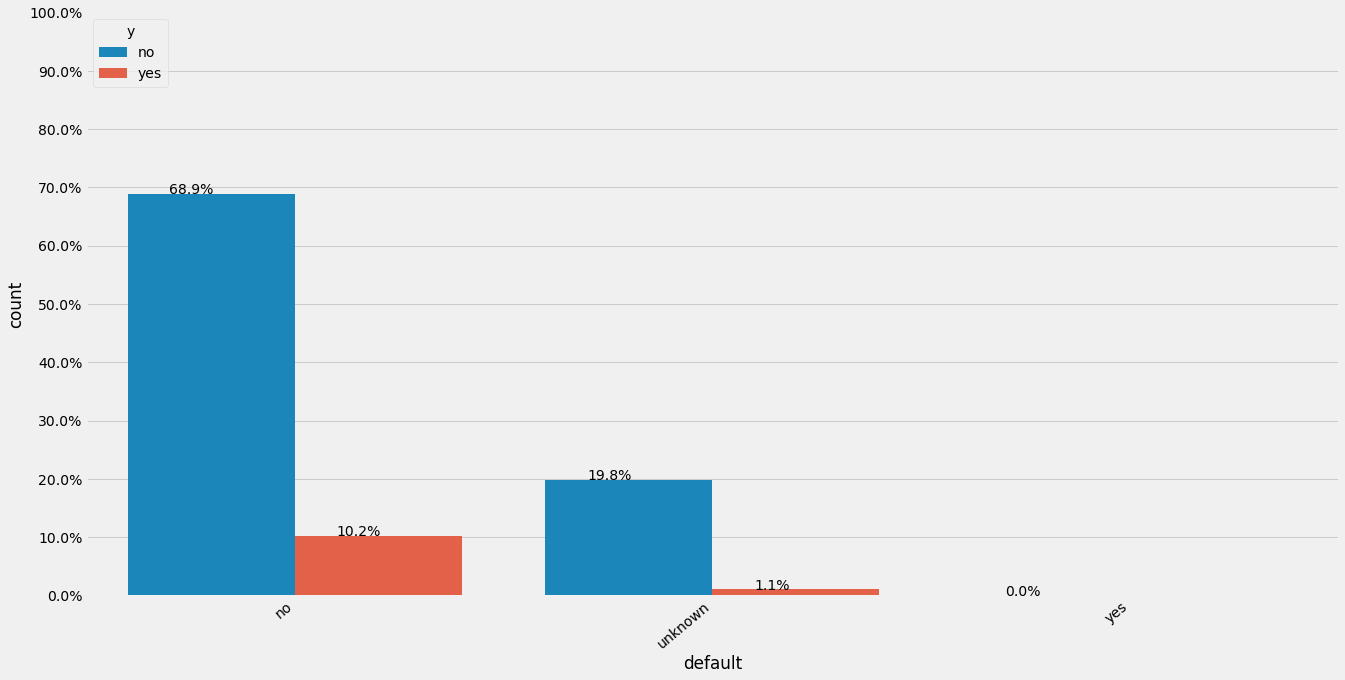

In [171]:
countplot_withY('default', dfbank1)

##### There is possibility that one who doesn't have credit card has chance to subscribe compared with others. Default will be featured in the model

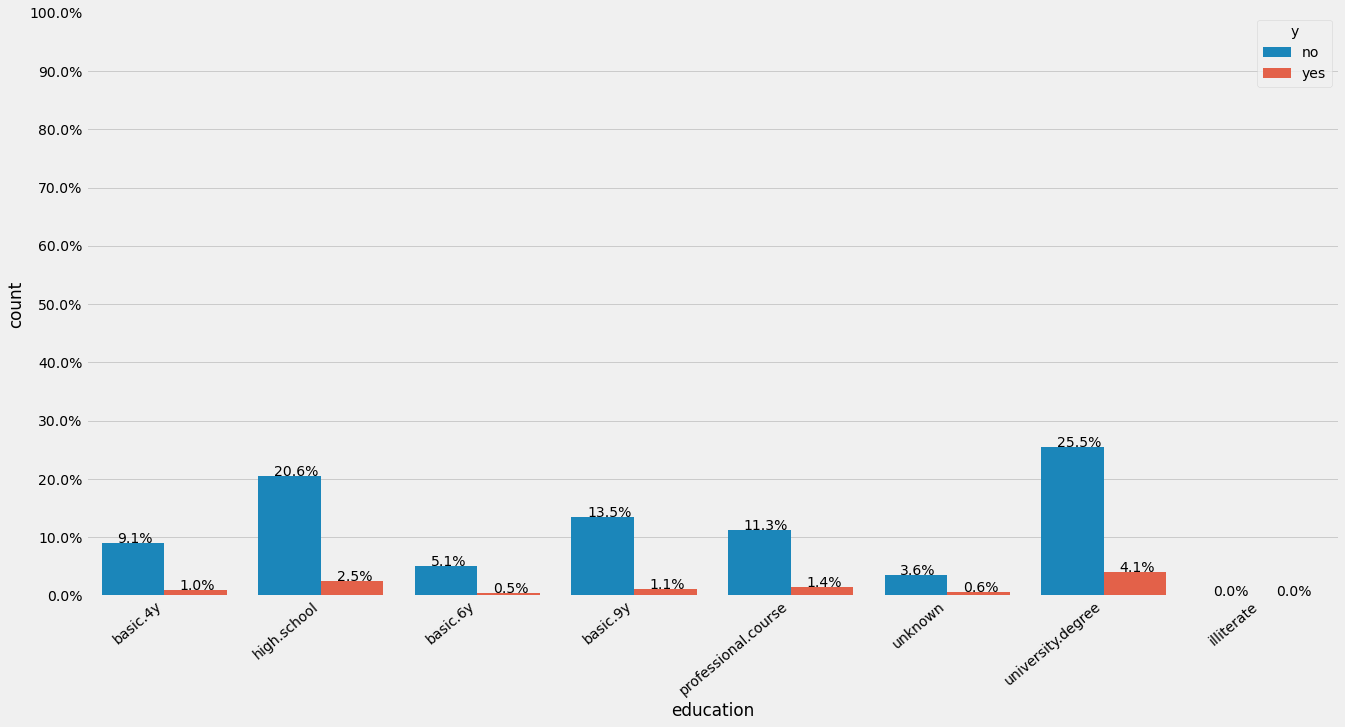

In [172]:
countplot_withY('education', dfbank1)

##### There is possibility that higher education status has chance to subscribe compared with others. Education will be featured in the model

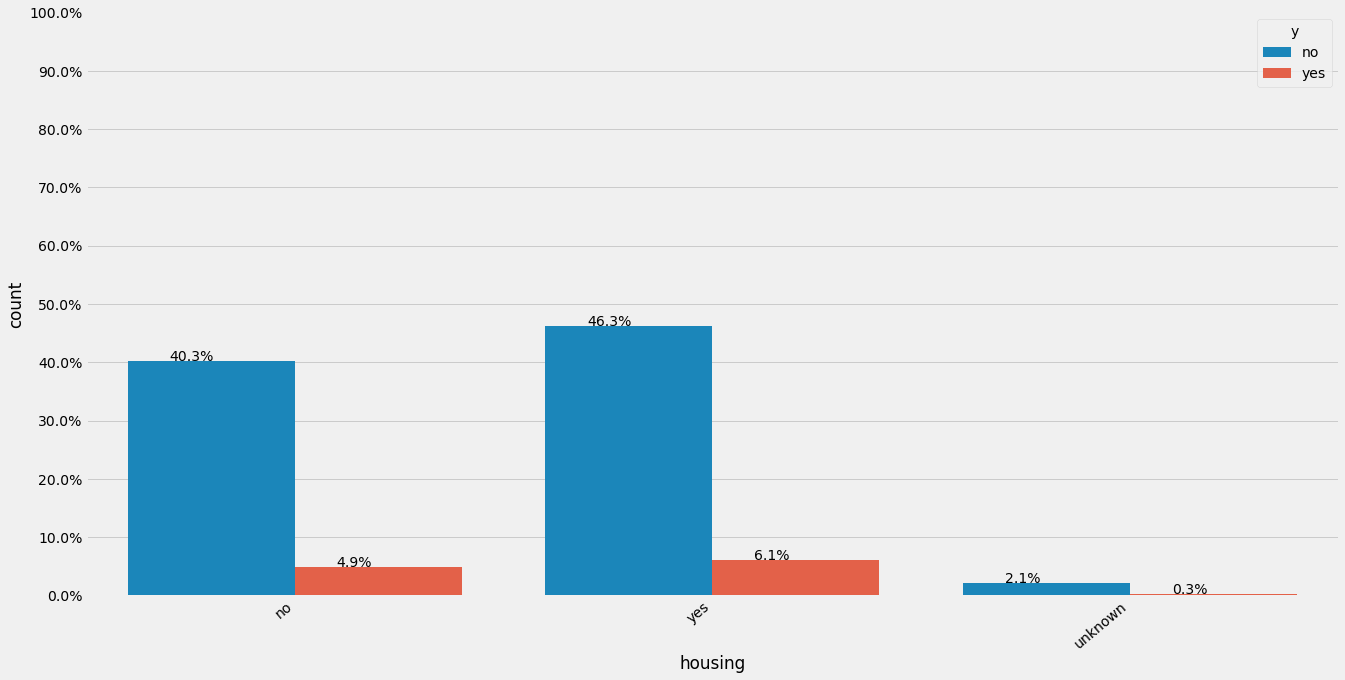

In [173]:
countplot_withY('housing', dfbank1)

##### There is possibility that one who has housing loan has chance to subscribe compared with others. Housing will be featured in the model

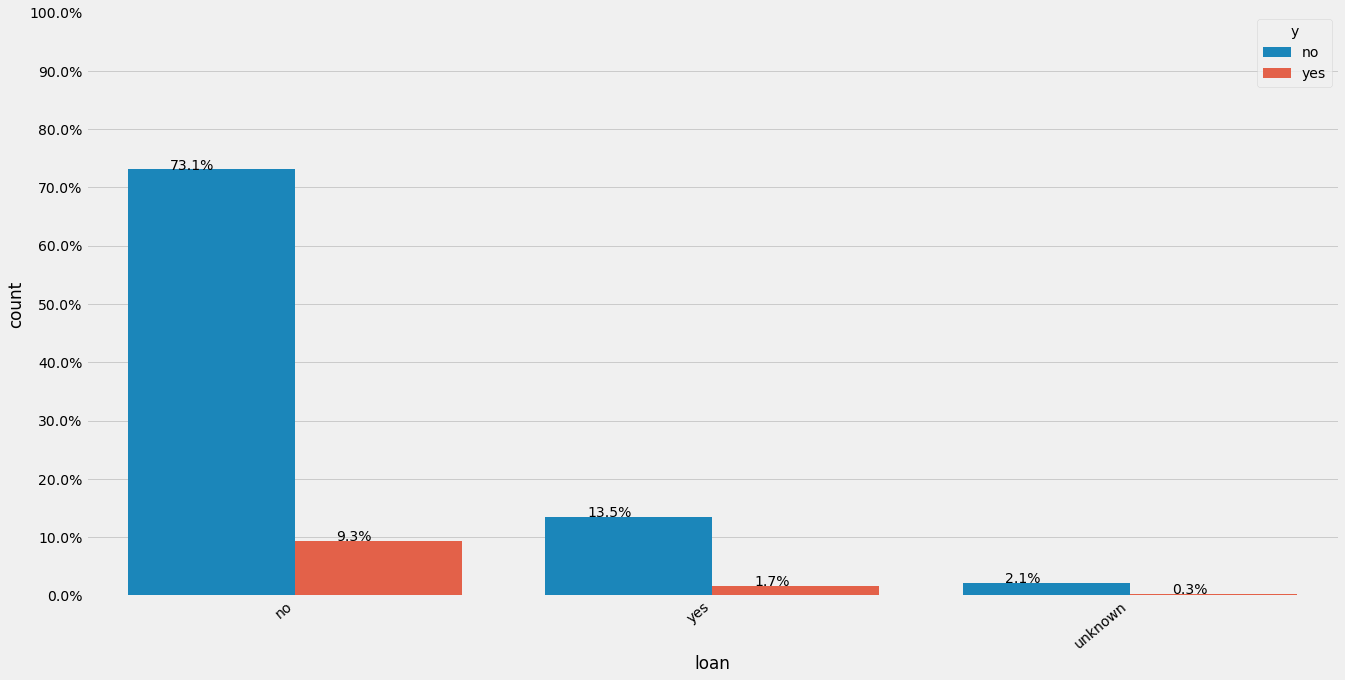

In [174]:
countplot_withY('loan', dfbank1)

##### There is possibility that one who doesn't have personal loan has higher chance to subscribe compared with others. Loan will be featured in the model

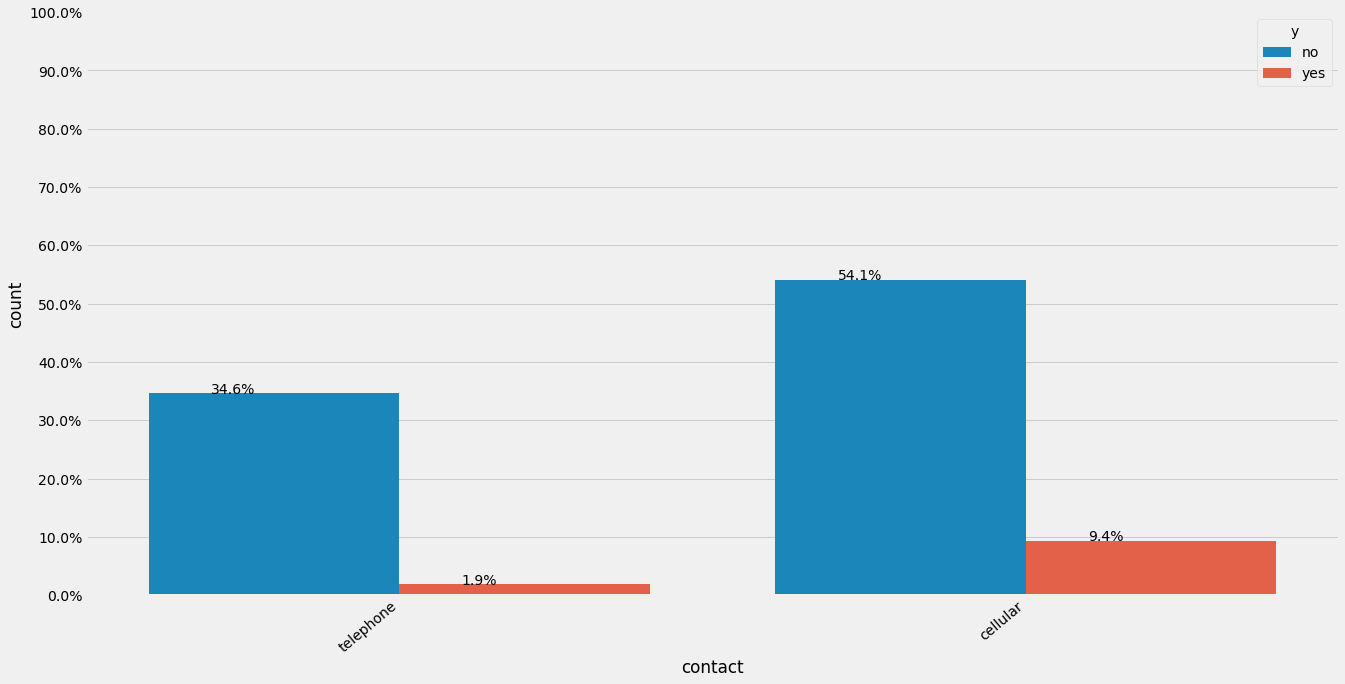

In [175]:
countplot_withY('contact', dfbank1)

##### Although more subscriber contacted by cellular, it just doesn't make sense to include this in the model because handphone is common rn. Contact won't be featured in the model

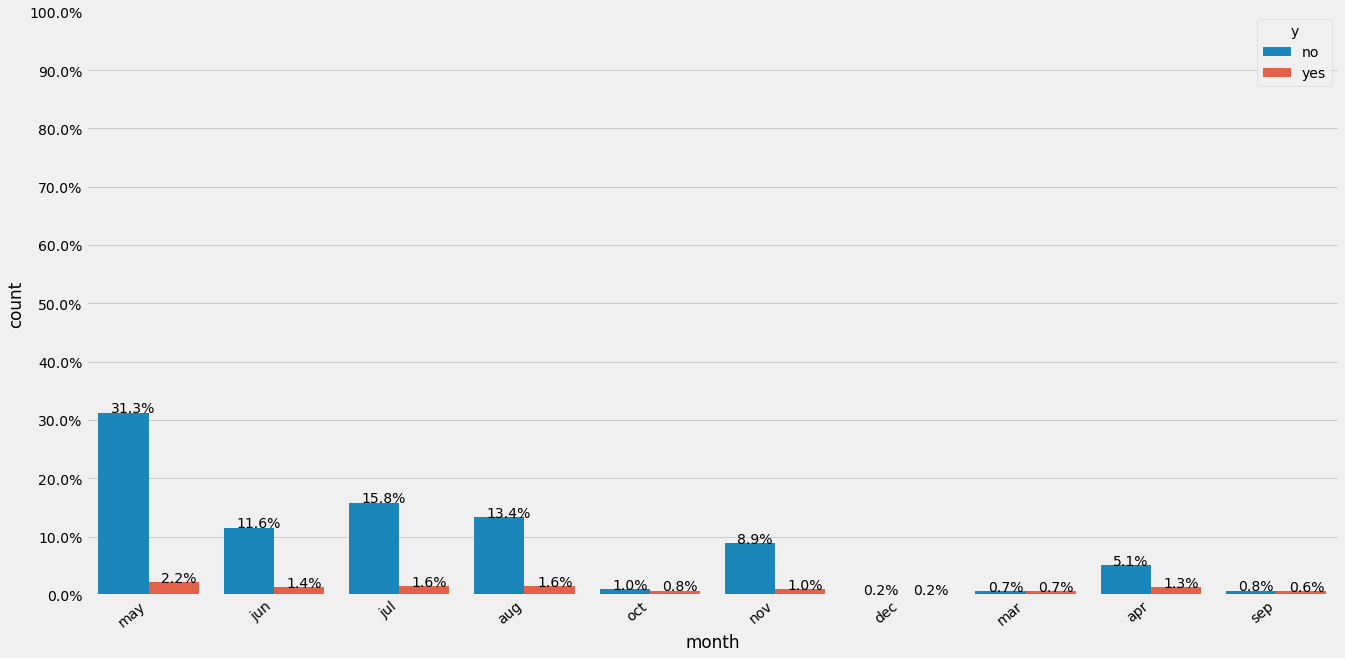

In [176]:
countplot_withY('month', dfbank1)

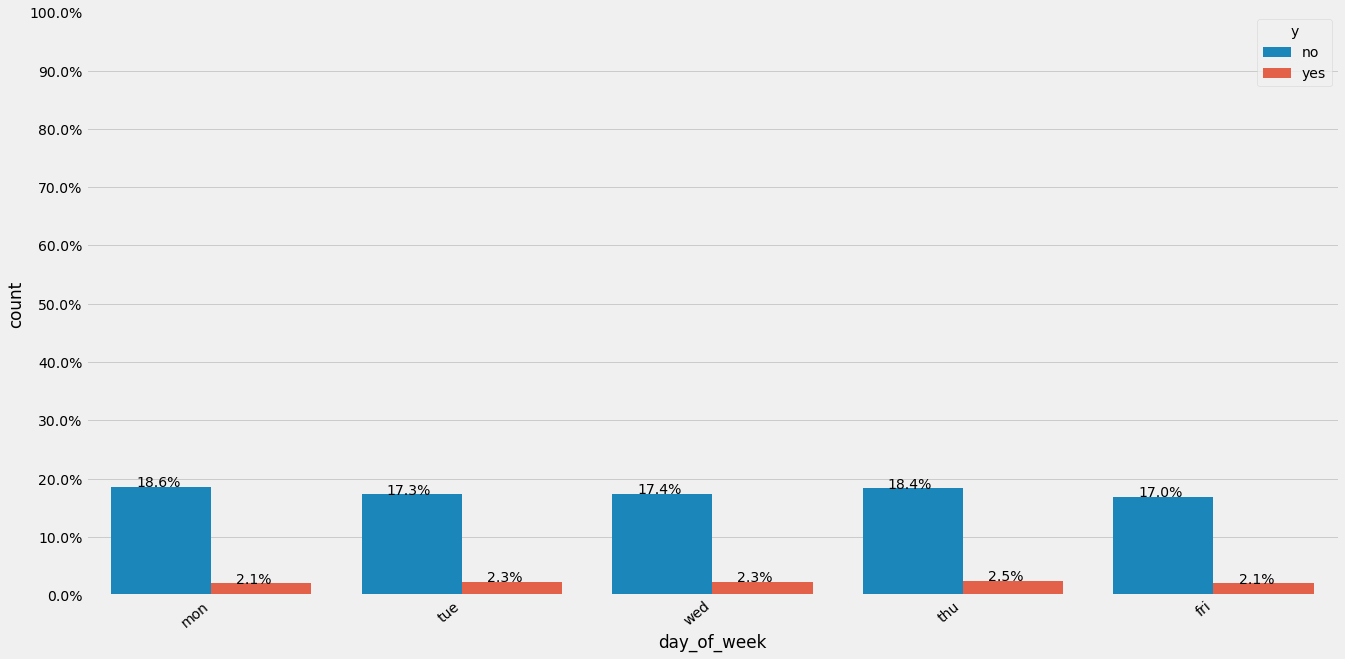

In [177]:
countplot_withY('day_of_week', dfbank1)

##### Month and day of week also won't be featured in the model because it's irrelevant

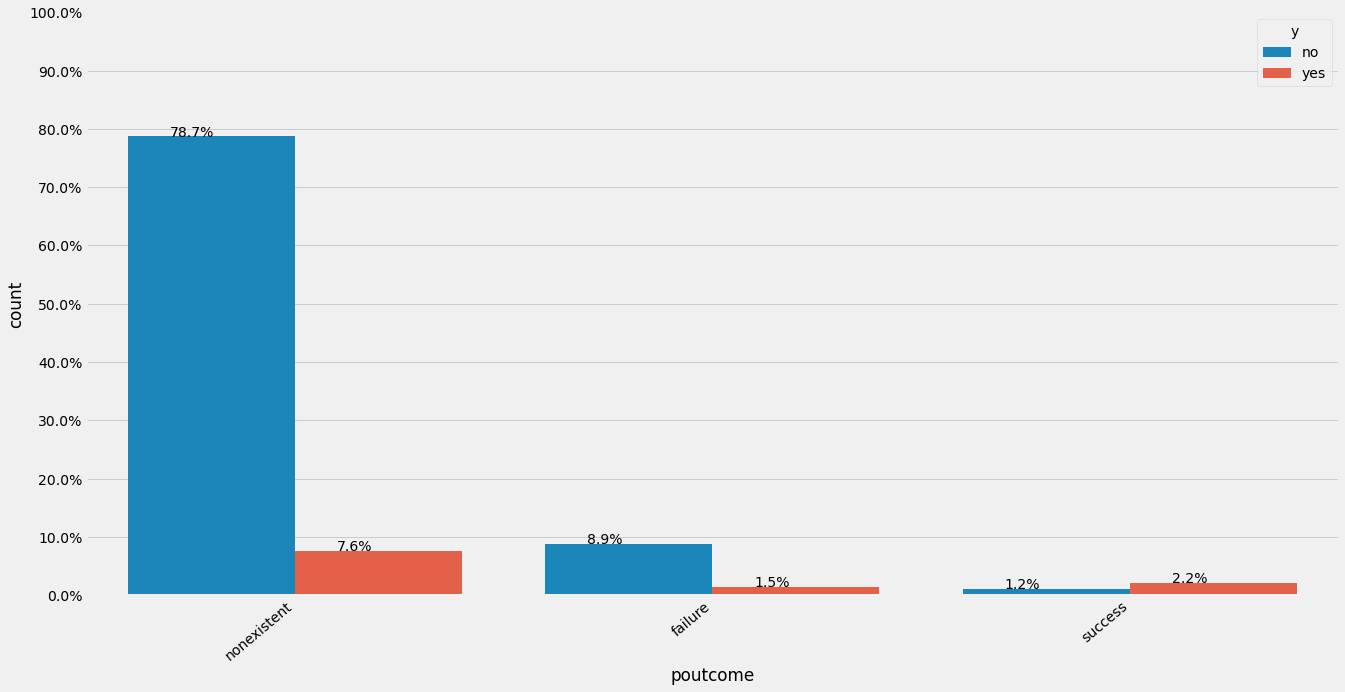

In [178]:
countplot_withY('poutcome', dfbank1)

##### There is possibility that firsts timer has higher chance to subscribe compared with others. Poutcome will be featured in the model

##### So from object dtype: job, marital, education, default, housing, loan, and poutcome will all be featured in the model

In [184]:
#delete duration column
dfbank2 = dfbank1.drop(columns=['duration'])
dfbank2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [185]:
#get dummy variables for categorical data
dfbank_cat = dfbank2[['job', 'marital', 'education', 'poutcome']]

dfbank_dummy = pd.get_dummies(dfbank_cat)

dfbank_dummy.shape

(41176, 27)

In [186]:
#mapping boolean data to 0/1/2
bol = {'yes': 1, 'no': 0, 'unknown':2}

dfbank2['default'] = dfbank2['default'].replace(bol).astype(np.float64)
dfbank2['housing'] = dfbank2['housing'].replace(bol).astype(np.float64)
dfbank2['loan'] = dfbank2['loan'].replace(bol).astype(np.float64)
dfbank2['y'] = dfbank2['y'].replace(bol).astype(np.float64)

In [187]:
dfbank2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,services,married,high.school,2.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0.0,1.0,0.0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1.0
41184,46,blue-collar,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.0
41185,56,retired,married,university.degree,0.0,1.0,0.0,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.0
41186,44,technician,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1.0


In [190]:
dfbank_X_final = pd.concat([dfbank2[['default', 'housing', 'loan', 
                                    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']], 
                                    dfbank_dummy], axis=1).fillna(0)
dfbank_X_final.shape

(41176, 35)

In [191]:
dfbank_X_final.head(10)

,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0.0,1.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0.0,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,2.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,1,0,0,0,0,0,0,1,0
6,0.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,0,1,0,0,0,1,0
7,2.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,1,...,0,0,0,0,0,0,1,0,1,0
8,0.0,1.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0.0,1.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [196]:
y_final = dfbank2['y']
y_final.shape

(41176,)

In [199]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(dfbank_X_final, y_final, test_size=0.33, random_state=33)

print('training size:', X_train.shape)
print('test size:', X_test.shape)

training size: (27587, 35)
test size: (13589, 35)


In [200]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)

    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)

    print('--training performance--')
    print('target:\n', y_train[:10])
    print('prediction:\n', train_pred[:10])
    print('accuracy score:', train_acc)
    print()
    print('--test performance--')
    print('target:\n', y_test[:10])
    print('prediction:\n', test_pred[:10])
    print('accuracy score:', test_acc)
    
    print(classification_report(y_test, test_pred))

In [211]:
#create models and check their classification report
logistic = LogisticRegression()
knn = KNeighborsClassifier()
bayes = GaussianNB()
dtree = DecisionTreeClassifier()
forest = RandomForestClassifier()
svc = SVC()

for model in [logistic, knn, bayes, dtree, forest, svc]:
    print('Training', model.__class__)
    train_model(model, X_train, X_test, y_train, y_test)
    print('===========================================')

Training <class 'sklearn.linear_model._logistic.LogisticRegression'>


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--training performance--
target:
 6896     0.0
16106    0.0
32346    0.0
24049    1.0
25093    0.0
41080    0.0
10197    0.0
19968    0.0
40670    1.0
22678    0.0
Name: y, dtype: float64
prediction:
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
accuracy score: 0.8956754993293943

--test performance--
target:
 9300     0.0
3177     0.0
23355    0.0
20560    0.0
16074    0.0
7250     0.0
29444    0.0
12382    0.0
20441    0.0
35149    0.0
Name: y, dtype: float64
prediction:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
accuracy score: 0.8957244830377511
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     12050
         1.0       0.62      0.20      0.31      1539

    accuracy                           0.90     13589
   macro avg       0.76      0.59      0.63     13589
weighted avg       0.87      0.90      0.87     13589

Training <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
--training performance--
target:
 6896     0.0
16106    0.0
32346 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [212]:
#check models accuracy score
for model in [logistic, knn, bayes, dtree, forest, svc]:
    print(model.__class__)
    print('Score:', model.score(dfbank_X_final, y_final))
    print('===========================================')

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Score: 0.8956916650476006
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Score: 0.9050174859141248
<class 'sklearn.naive_bayes.GaussianNB'>
Score: 0.8352924033417525
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Score: 0.9325092286768991
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Score: 0.9364921313386438
<class 'sklearn.svm._classes.SVC'>
Score: 0.8873372838546726


In [230]:
logistic_acc = logistic.score(dfbank_X_final, y_final)
knn_acc = knn.score(dfbank_X_final, y_final)
bayes_acc = bayes.score(dfbank_X_final, y_final)
dtree_acc = dtree.score(dfbank_X_final, y_final)
forest_acc = forest.score(dfbank_X_final, y_final)
svc_acc = svc.score(dfbank_X_final, y_final)

In [231]:
#sorting
models = pd.DataFrame({
                'Models': ['Logistic Model', 'KNN Model', 'Gausian NB', 'Decision Tree Classifier',
                           'Random Forest Classifier', 'Support Vector Machine'],
                'Accuracy Score':  [logistic_acc, knn_acc, bayes_acc, dtree_acc, forest_acc, svc_acc]})

models.sort_values(by='Accuracy Score', ascending=False)

,Models,Accuracy Score
4,Random Forest Classifier,0.936492
3,Decision Tree Classifier,0.932509
1,KNN Model,0.905017
0,Logistic Model,0.895692
5,Support Vector Machine,0.887337
2,Gausian NB,0.835292


### The most suitable machine learning model for this bank marketing dataset is Random Forest Classifier because it has the highest accuracy score compared with other models.

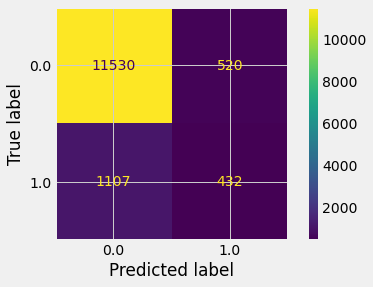

In [233]:
#create confusion matrix for Random Forest model using sklearn
plot_confusion_matrix(forest, X_test, y_test)
plt.show()

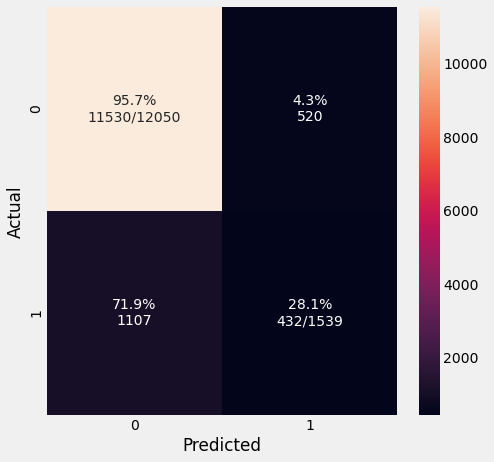

In [234]:
#create confusion matrix for Random Forest model using seaborn
test_pred = forest.predict(X_test)

cm = confusion_matrix(y_test, test_pred)
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)
cm = pd.DataFrame(cm)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=annot, fmt='', ax=ax)

In [235]:
#checking feature of importances of Random Forest model
feature_imp=pd.Series(
    forest.feature_importances_, index=dfbank_X_final.columns).sort_values(ascending=False)
feature_imp

euribor3m                        0.325370
nr.employed                      0.071936
housing                          0.065574
cons.conf.idx                    0.048411
loan                             0.046042
cons.price.idx                   0.044722
poutcome_success                 0.042110
emp.var.rate                     0.033928
default                          0.020965
job_admin.                       0.019762
education_high.school            0.019053
marital_married                  0.018861
education_university.degree      0.018288
job_technician                   0.017129
poutcome_nonexistent             0.016626
marital_single                   0.016152
education_professional.course    0.015569
poutcome_failure                 0.014030
job_blue-collar                  0.012980
marital_divorced                 0.012731
education_basic.9y               0.012566
job_retired                      0.012247
job_management                   0.011930
job_services                     0

Text(0, 0.5, 'Feature')

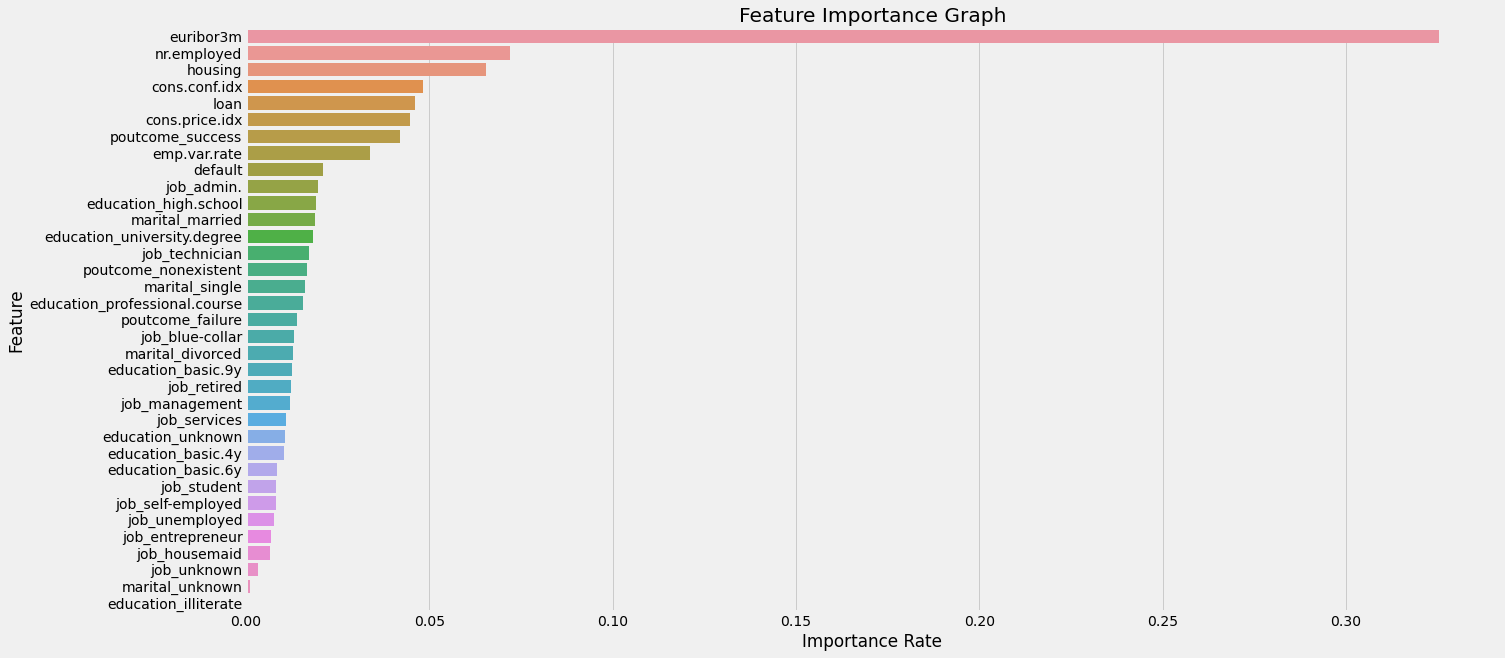

In [236]:
#plotting feature of importances
plt.figure(figsize=(20,10))
sns.barplot(feature_imp, y=feature_imp.index)
plt.title('Feature Importance Graph')
plt.xlabel('Importance Rate')
plt.ylabel('Feature')